In [90]:
import pandas as pd
from tqdm import tqdm
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from wordcloud import WordCloud, STOPWORDS
from matplotlib import rcParams
import operator
import warnings
warnings.filterwarnings('ignore')

In [91]:
from scipy.stats import zscore
from scipy import sparse
import sklearn.feature_extraction.text as sk_text
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import os , io
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from keras.models import Sequential
import requests
from keras.callbacks import ModelCheckpoint
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid", color_codes = True,font_scale = 1.5)
from datetime import datetime
from IPython.display import display, Markdown
import random
import re
from bs4 import BeautifulSoup
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, ClassifierMixin
import string
import nltk
from sklearn.pipeline import Pipeline
%config InlineBackend.figure_format='retina'

# Introduction

We decided to analyze the Yelp Dataset in order to discern different patterns that could be found in the data, in particular regarding restaurants. Some specific aspects that we looked at were:
* Defining Characteristics of Positive and Negative Reviews
* Recommendation System
* Multi-class Classification

# Data Extraction

### Note: For the next few cells to work, you MUST run "Data_Extraction.ipynb"!

## business.json

In [2]:
# Reading in 'extacted_restaurants_from_business.csv'
rest_biz_csvTOpd = pd.read_csv('extracted_restaurants_from_business.csv')

In [3]:
# Business IDs for the restaurants
restaurant_id_list = rest_biz_csvTOpd.business_id.tolist()
restaurant_id_list[:5]

['QXAEGFB4oINsVuTFxEYKFQ',
 'gnKjwL_1w79qoiV3IC_xQQ',
 '1Dfx3zM-rW4n-31KeC8sJg',
 'fweCYi8FmbJXHCqLnwuk8w',
 'PZ-LZzSlhSe9utkQYU8pFg']

In [4]:
print('Number of restaurants in the original dataset:',len(restaurant_id_list))

Number of restaurants in the original dataset: 59371


## review.json

In [94]:
# Reading in 'extracted_restaurants_from_review.csv'
rest_review_csvTOpd = pd.read_csv('extracted_restaurants_from_review.csv')

In [97]:
rest_review_csvTOpd.shape

(4201685, 5)

In [95]:
# Rename column containing the old indices
rest_review_csvTOpd.rename(columns={"Unnamed: 0": "Index_From_review.JSON"}).head()

Index_From_review.JSON               review_id             business_id  \
0                      3  yi0R0Ugj_xUx_Nek0-_Qig  ikCg8xy5JIg_NGPx-MSIDA   
1                      5  fdiNeiN_hoCxCMy2wTRW9g  eU_713ec6fTGNO4BegRaww   
2                      6  G7XHMxG0bx9oBJNECG4IFg  3fw2X5bZYeW9xCz_zGhOHg   
3                      7  8e9HxxLjjqc9ez5ezzN7iQ  zvO-PJCpNk4fgAVUnExYAA   
4                     10  kbtscdyz6lvrtGjD1quQTg  8mIrX_LrOnAqWsB5JrOojQ   

   stars                                               text  
0    5.0  Went in for a lunch. Steak sandwich was delici...  
1    4.0  I'll be the first to admit that I was not exci...  
2    3.0  Tracy dessert had a big name in Hong Kong and ...  
3    1.0  This place has gone down hill.  Clearly they h...  
4    4.0  Like walking back in time, every Saturday morn...

## Clean Data

In [ ]:
review_business_sample = pd.read_csv("yelp_reviews_restaurants_clean.csv")

In [ ]:
initial_load = pd.read_csv('yelp_reviews_restaurants.csv')

### Clean data & Get sample (20%)

In [ ]:
initial_load = initial_load[['business_id', 'review_stars', 'text', 'cool', 'useful', 'funny'  ]]
clean_yelp_2 = initial_load[initial_load.review_stars.isna() == False]
clean_yelp_1 = clean_yelp_2[clean_yelp_2.review_stars != '']
clean_yelp = clean_yelp_1.fillna('')
clean_yelp['text length'] = clean_yelp['text'].str.len()
clean_yelp['review_stars'] = clean_yelp['review_stars'].astype(int)
yelp = clean_yelp.sample(frac = .04, random_state = 42)

# Exploratory Data Analysis

## The Data

### Description of data

The Yelp dataset is downloaded from the Yelp website. This set includes information about local businesses in 10 metropolitan areas across 2 countries. From the review and business tables, we attracted only the restaurants from the total of 1290 categories.

Attribues of atracted table are as following:

- business_id: ID of the business
- name: name of the business
- address: address of the business
- city: city of the business
- state: state of the business
- postal_code: postal code of the business
- latitude: latitude of the business
- longitude: longitude of the business
- stars: average rating of the business
- categories: multiple categories of the business
- review_id: ID of the review
- review_stars: ratings of the business
- useful: number of users who vote a review as usefull
- funny: number of users who vote a review as funny
- cool: number of users who vote a review as cool
- text: review from the user

## Metrics

In [8]:
def all_metrics(true_labels, predicted_labels):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'), 4))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4))
    print('F1-Score:', np.round(metrics.f1_score(true_labels, predicted_labels,average='weighted'), 4))

### Number of Reviews

In [9]:
rest_review_length = len(rest_review_csvTOpd)
print("There are {} restaurant reviews.".format(rest_review_length))

There are 4201685 restaurant reviews.


In [10]:
one_star = rest_review_csvTOpd.loc[rest_review_csvTOpd['stars'] == 1.0]
two_star = rest_review_csvTOpd.loc[rest_review_csvTOpd['stars'] == 2.0]
three_star = rest_review_csvTOpd.loc[rest_review_csvTOpd['stars'] == 3.0]
four_star = rest_review_csvTOpd.loc[rest_review_csvTOpd['stars'] == 4.0]
five_star = rest_review_csvTOpd.loc[rest_review_csvTOpd['stars'] == 5.0]

In [11]:
# Figuring out what percentage of the "rest_review_csvTOpd" should be training data, and what percentage should be test data.
num_train_data = int(rest_review_length * 0.8)
print("For 80% of the data, there should be {} reviews.".format(num_train_data))

For 80% of the data, there should be 3361348 reviews.


# Modeling

## Modeling with 5 Labels

### Histogram of All Reviews in review.json

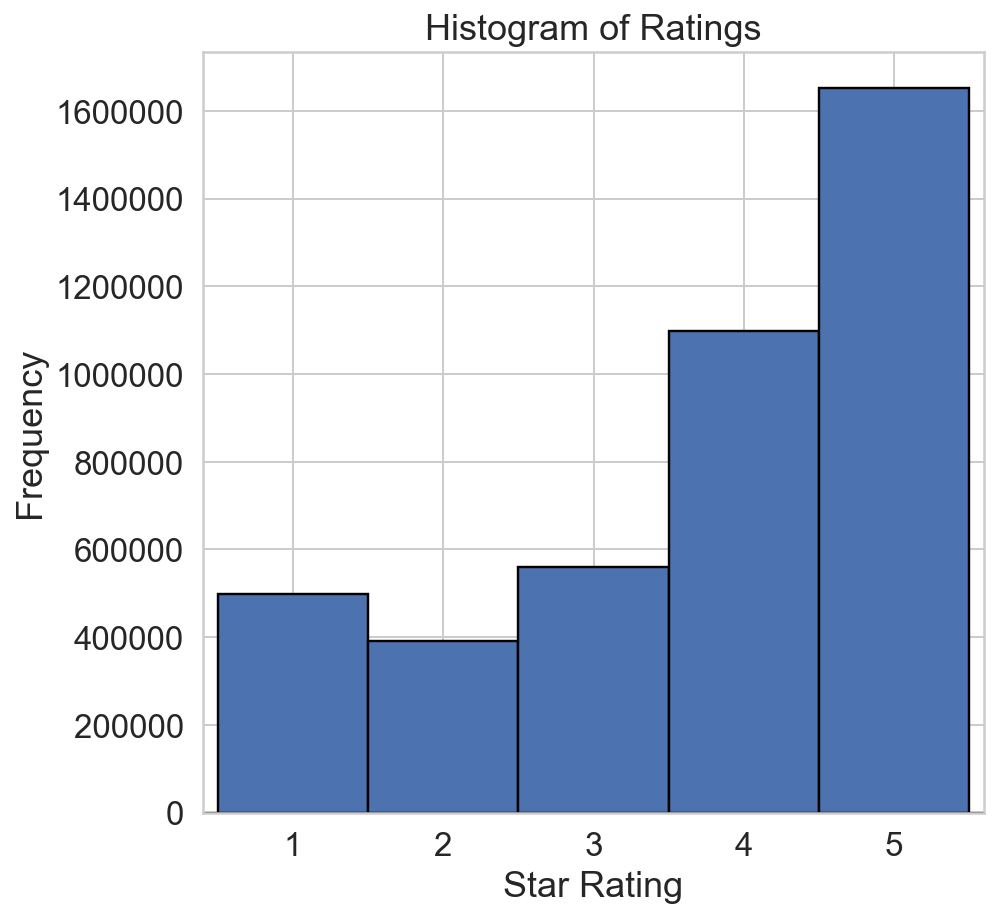

In [89]:
plt.figure(figsize=(7,7))
plt.hist(rest_review_csvTOpd.stars, bins=np.arange(10)-0.5, edgecolor='black', linewidth=1.2)
plt.xlim(0.4, 5.6)
plt.title("Histogram of Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Frequency")
plt.show()

### Data

In [13]:
# Train data for FIVE labels with equal amounts of each rating.
train_data = pd.concat([one_star.text[:1600], two_star.text[:1600], three_star.text[:1600], four_star.text[:1600], five_star.text[:1600]])
train_labels = pd.concat([one_star.stars[:1600], two_star.stars[:1600], three_star.stars[:1600], four_star.stars[:1600], five_star.stars[:1600]])

# Test data for FIVE labels with equal amounts of each rating.
test_data = pd.concat([one_star.text[1600:1700], two_star.text[1600:1700], three_star.text[1600:1700], four_star.text[1600:1700], five_star.text[1600:1700]])
test_labels = pd.concat([one_star.stars[1600:1700], two_star.stars[1600:1700], three_star.stars[1600:1700], four_star.stars[1600:1700], five_star.stars[1600:1700]])

### Histogram of Train Data

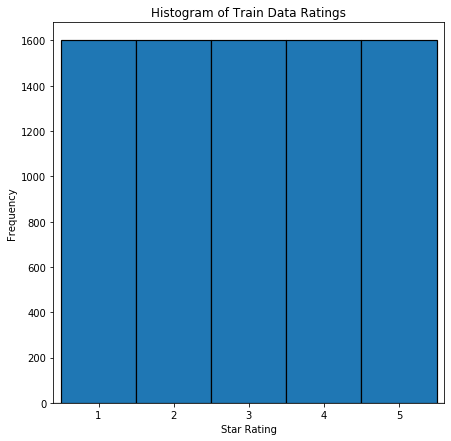

In [14]:
plt.figure(figsize=(7,7))
plt.hist(train_labels, bins=np.arange(10)-0.5, edgecolor='black', linewidth=1.2)
plt.xlim(0.4, 5.6)
plt.title("Histogram of Train Data Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Frequency")
plt.show()

### CountVectorizer

In [15]:
# Fit CountVectorizer with your text data
cvector = CountVectorizer()
# train_data = testset.text.tolist()
vtrain = cvector.fit_transform(train_data)
vtest = cvector.transform(test_data)

In [16]:
# Train LogisticRegression Classifier
print('Metrics for Logistic Regression Model for CountVectorizer:')
lr_classifier = LogisticRegression(C=0.09)
lr_classifier.fit(vtrain, train_labels)
train_predicted_labels = lr_classifier.predict(vtest)
all_metrics(test_labels, train_predicted_labels)

Accuracy: 0.51
Precision: 0.5038
Recall: 0.51
F1-Score: 0.5059


#### Confusion Matrix for CountVectorizer

In [17]:
print(confusion_matrix(test_labels, train_predicted_labels))

[[69 23  5  3  0]
 [27 38 27  5  3]
 [ 6 21 42 25  6]
 [ 4  8 11 40 37]
 [ 1  2  4 27 66]]


* Note: Rows reflect the actual values. Columns reflect the predicted values.

* Fairly standard confusion matrix with the majority of test_labels and predicted_labels in the same game.

### TF-IDF Vectorizer

In [18]:
# Fit TfidfVectorizer with your text data
tvector = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2))
vtrain = tvector.fit_transform(train_data)
vtest = tvector.transform(test_data)
tvector.fit(test_data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=0.0, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [19]:
# Train LogisticRegression Classifier
lr_classifier = LogisticRegression(C=0.09)
lr_classifier.fit(vtrain, train_labels)
train_predicted_labels = lr_classifier.predict(vtest)
all_metrics(test_labels, train_predicted_labels)

Accuracy: 0.494
Precision: 0.4819
Recall: 0.494
F1-Score: 0.4808


#### Confusion Matrix for TF-IDF Vectorizer

In [20]:
print(confusion_matrix(test_labels, train_predicted_labels))

[[70 22  5  0  3]
 [27 29 31  5  8]
 [ 5 17 53 13 12]
 [ 4  8 23 27 38]
 [ 1  5  8 18 68]]


* What's interesting about this particular matrix is the 4th row. About 38 reviews are predicted to be 5-star reviews, but in actuality they are 4-star reviews of the restaurant. The number of predicted 5-star reviews for ones that are actually 4-star reviews shows that it is difficult to distinguish a 4-star review from a five star one. One possible reason for this is because people often reserve a 5-star style meal for truly exceptional meals. Thus even though they talk about positive aspects of the meal in their 4-star rating, they could be giving the review 4-stars just because it wasn't the "best". 

* This result prompted us to think about working with less labels rather than the current schema of 5 labels, one for each star rating. Perhaps with less labels, it will be much clearer to distinguish clearer difference between labels.

## Modeling with Simplified Labels

### Data

In [21]:
# Train data for 3 labels with equal amounts of each rating.
train_data = pd.concat([one_star.text[:1600], two_star.text[:1600], three_star.text[:1600], four_star.text[:1600], five_star.text[:1600]])
train_labels = pd.concat([one_star.stars[:1600], one_star.stars[:1600], three_star.stars[:1600], five_star.stars[:1600], five_star.stars[:1600]])

test_data = pd.concat([one_star.text[1600:1700], two_star.text[1600:1700], three_star.text[1600:1700], four_star.text[1600:1700], five_star.text[1600:1700]])
test_labels = pd.concat([one_star.stars[1600:1700], one_star.stars[1600:1700], three_star.stars[1600:1700], five_star.stars[1600:1700], five_star.stars[1600:1700]])

* The simplified data essentially simplified the 5-star rating system into three bins: bad reviews, neutral reviews, and good reviews.

### Histogram of Simplified Train Data

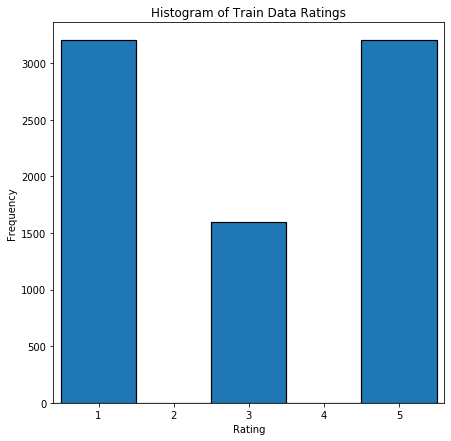

In [22]:
plt.figure(figsize=(7,7))
plt.hist(train_labels, bins=np.arange(10)-0.5, edgecolor='black', linewidth=1.2)
plt.xlim(0.4, 5.6)
plt.title("Histogram of Train Data Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

* Here, the 1-star and 2-star ratings were the bad reviews, the 3-star rating consisted of the neutral reviews, and the 4-star and the 5-star ratings were the good reviews.

### CountVectorizer

In [23]:
# Fit CountVectorizer with your text data
cvector = CountVectorizer()
vtrain = cvector.fit_transform(train_data)
vtest = cvector.transform(test_data)

In [24]:
# Train LogisticRegression Classifier
print('Metrics for Logistic Regression Model for CountVectorizer:')
lr_classifier = LogisticRegression(C=0.09)
lr_classifier.fit(vtrain, train_labels)
train_predicted_labels = lr_classifier.predict(vtest)
all_metrics(test_labels, train_predicted_labels)

Accuracy: 0.778
Precision: 0.7645
Recall: 0.778
F1-Score: 0.7646


#### Confusion Matrix for CountVectorizer

In [25]:
print(confusion_matrix(test_labels, train_predicted_labels))

[[169  15  16]
 [ 33  39  28]
 [ 10   9 181]]


## Sample Predictions

In [26]:
# Fit CountVectorizer with your text data
cvector = CountVectorizer()
vtrain = cvector.fit_transform(train_data)
vtest = cvector.transform(test_data)

In [58]:
# Train LogisticRegression Classifier
print('Metrics for Logistic Regression Model for CountVectorizer:')
lr_classifier = LogisticRegression(C=0.09)
lr_classifier.fit(vtrain, train_labels)
train_predicted_labels = lr_classifier.predict(vtest)
all_metrics(test_labels, train_predicted_labels)

Metrics for Logistic Regression Model for CountVectorizer:
Accuracy: 0.778
Precision: 0.7645
Recall: 0.778
F1-Score: 0.7646


In [28]:
# Predict new sentence #1.
test_sentence = ["I hate this place"]
new_test = cvector.transform(test_sentence)
lr_classifier.predict(new_test)
lr_classifier.predict_proba(new_test)

array([[0.47168233, 0.172166  , 0.35615168]])

In [29]:
# Predict new sentence #2.
test_sentence = ["Great place"]
new_test = cvector.transform(test_sentence)
lr_classifier.predict(new_test)
lr_classifier.predict_proba(new_test)

array([[0.25371724, 0.15154494, 0.59473782]])

For sentence #1, the model predicts the review to be a negative review, whereas the model predicts that sentence #2 is most likely a positive review.

# Predictions Without Neutral Reviews

In [30]:
# Redoing Analysis with Neutral Reviews
NO3_train_data = pd.concat([one_star.text[:1600], two_star.text[:1600], four_star.text[:1600], five_star.text[:1600]])
NO3_train_labels = pd.concat([one_star.stars[:1600], one_star.stars[:1600], five_star.stars[:1600], five_star.stars[:1600]])

NO3_test_data = pd.concat([one_star.text[1600:1700], two_star.text[1600:1700], four_star.text[1600:1700], five_star.text[1600:1700]])
NO3_test_labels = pd.concat([one_star.stars[1600:1700], one_star.stars[1600:1700], five_star.stars[1600:1700], five_star.stars[1600:1700]])

### CountVectorizer

In [31]:
# Fit CountVectorizer with your text data
cvector = CountVectorizer()
v_NO3_train = cvector.fit_transform(NO3_train_data)
v_NO3_test = cvector.transform(NO3_test_data)

In [32]:
# Train LogisticRegression Classifier
print('Metrics for Logistic Regression Model for CountVectorizer:')
lr_classifier = LogisticRegression(C=0.08)
lr_classifier.fit(v_NO3_train, NO3_train_labels)
train_predicted_labels = lr_classifier.predict(v_NO3_test)
all_metrics(NO3_test_labels, train_predicted_labels)

Accuracy: 0.9175
Precision: 0.918
Recall: 0.9175
F1-Score: 0.9175


#### Confusion Matrix for CountVectorizer

In [33]:
print(confusion_matrix(NO3_test_labels, train_predicted_labels))

[[180  20]
 [ 13 187]]


### TF-IDF Vectorizer

In [34]:
# Fit TfidfVectorizer with your text data
tvector = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2))
v_NO3_train = tvector.fit_transform(NO3_train_data)
v_NO3_test = tvector.transform(NO3_test_data)

In [35]:
# Train LogisticRegression Classifier
lr_classifier = LogisticRegression(C=0.09)
lr_classifier.fit(v_NO3_train, NO3_train_labels)
train_predicted_labels = lr_classifier.predict(v_NO3_test)
all_metrics(NO3_test_labels, train_predicted_labels)

Accuracy: 0.8675
Precision: 0.8682
Recall: 0.8675
F1-Score: 0.8674


#### Confusion Matrix for TF-IDF Vectorizer

In [36]:
print(confusion_matrix(NO3_test_labels, train_predicted_labels))

[[178  22]
 [ 31 169]]


* So if we throw out the moderate data (the 3-star reviews), it is clear that there is a difference between positive and negative reviews. What are some of those differences in vocabulary though?

# Word Cloud

* Since we're looking to compare reviews written from either end of the spectrum of restraunt ratings, the data that we're looking to train will only consist of the extremes. 

In [37]:
cloud_train_data = pd.concat([one_star.text[:1600], five_star.text[:1600]]).tolist()
cloud_train_labels = pd.concat([one_star.stars[:1600], five_star.stars[:1600]])

## General Word Cloud

In [59]:
# Stopwords are words that are commonly used that have been purposefully programmed to be ignored.
stopwords = STOPWORDS
stopwords.add('food')
stopwords.add('place')
stopwords.add('ve')

In [60]:
# Here we're looking to 
general = " ".join(cloud_train_data)
wordcloud = WordCloud(stopwords = stopwords, width=1600, height=800, max_font_size=200).generate(general)

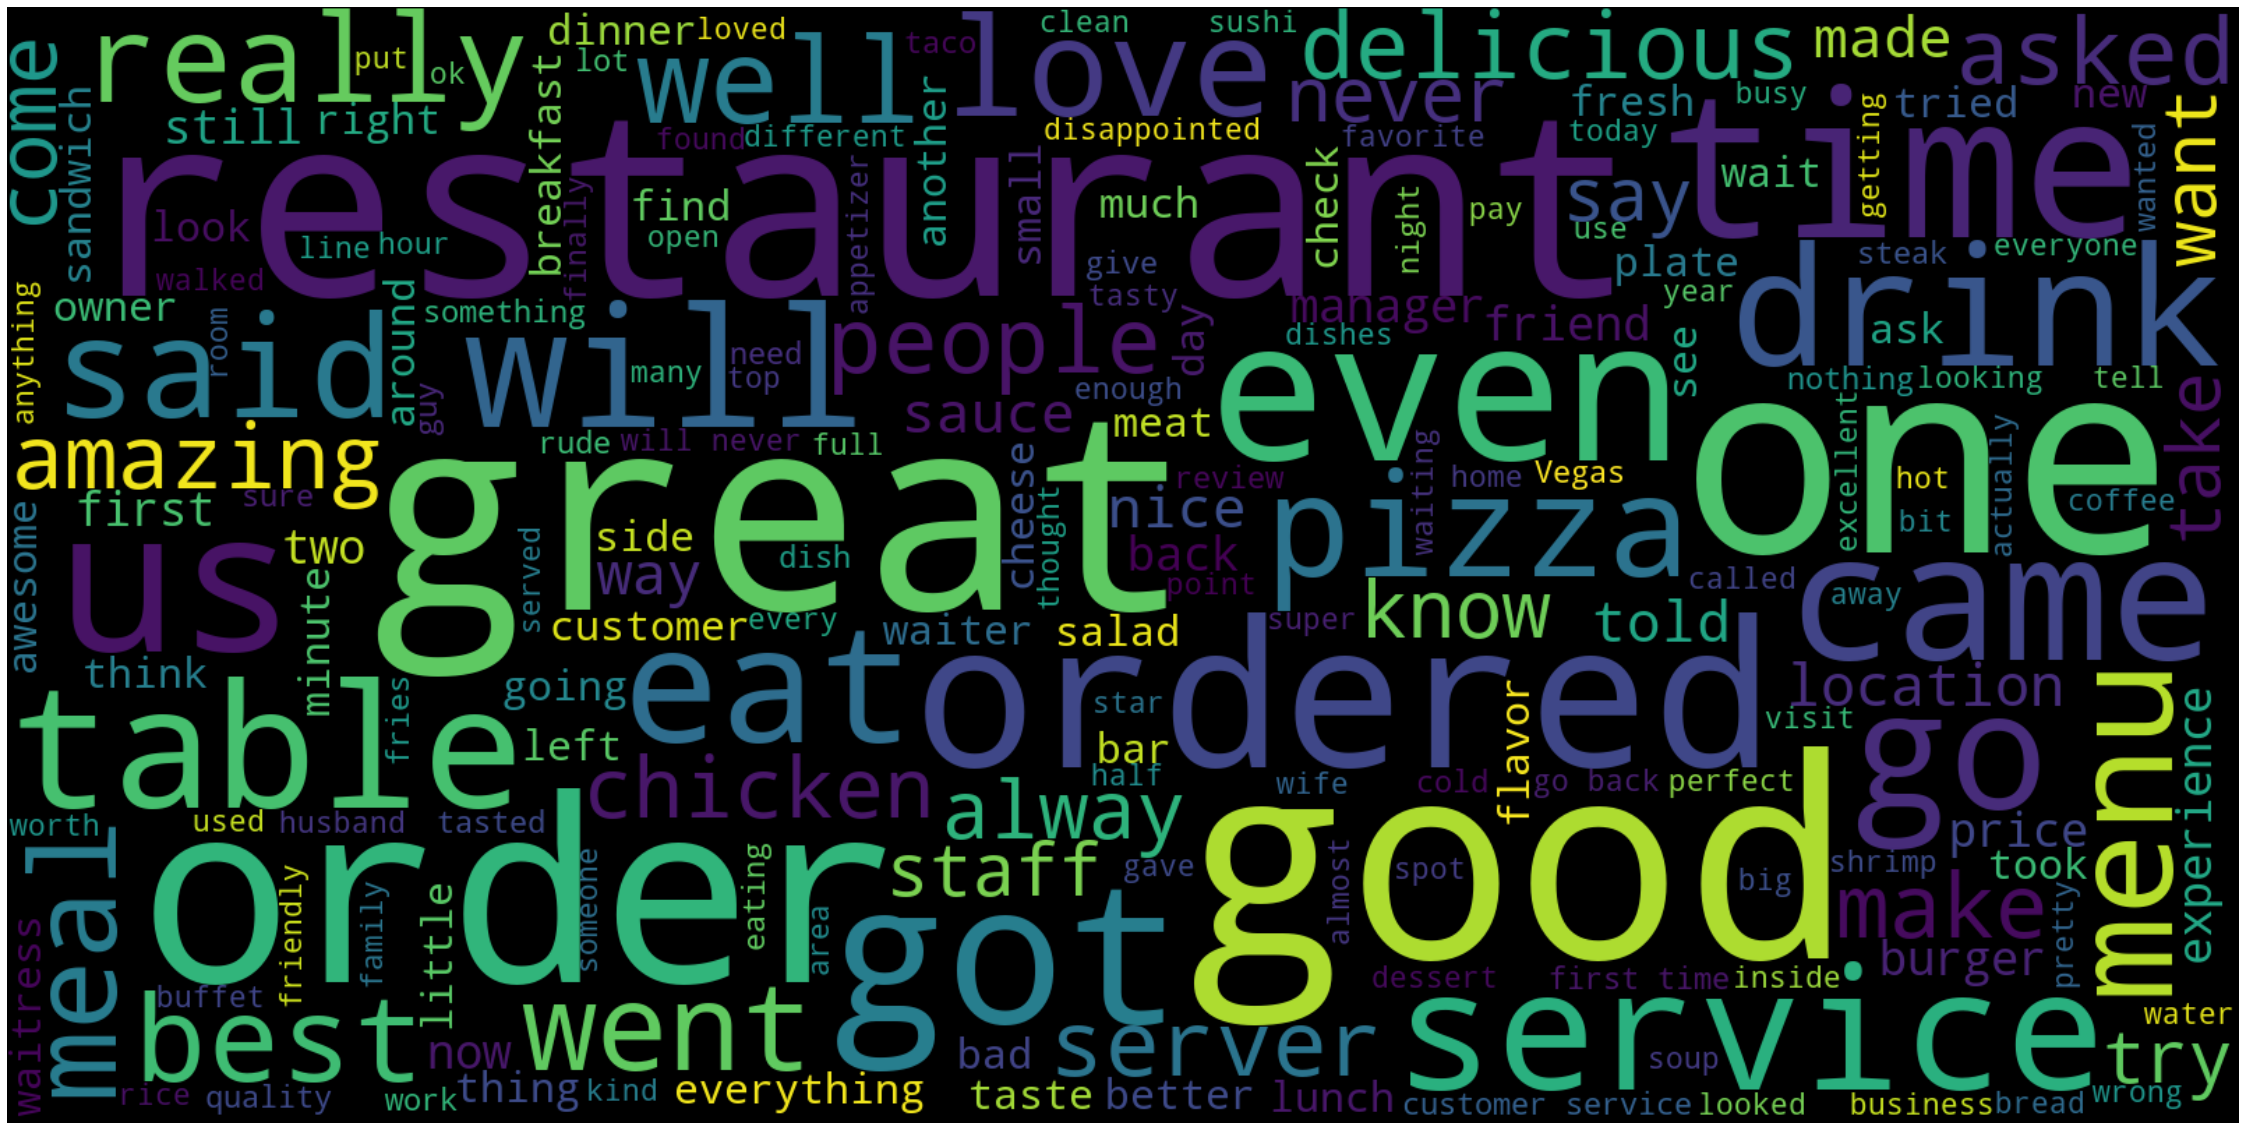

In [61]:
rcParams['figure.figsize'] = 40, 40
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

## General Word Cloud with Positive Reviews

In [62]:
# Positive Reviews Dataset
positive_reviews = five_star.text[1600:2000].tolist()
positive = " ".join(positive_reviews)

In [63]:
wordcloud = WordCloud(stopwords = stopwords, width=1600, height=800, max_font_size=200).generate(positive)

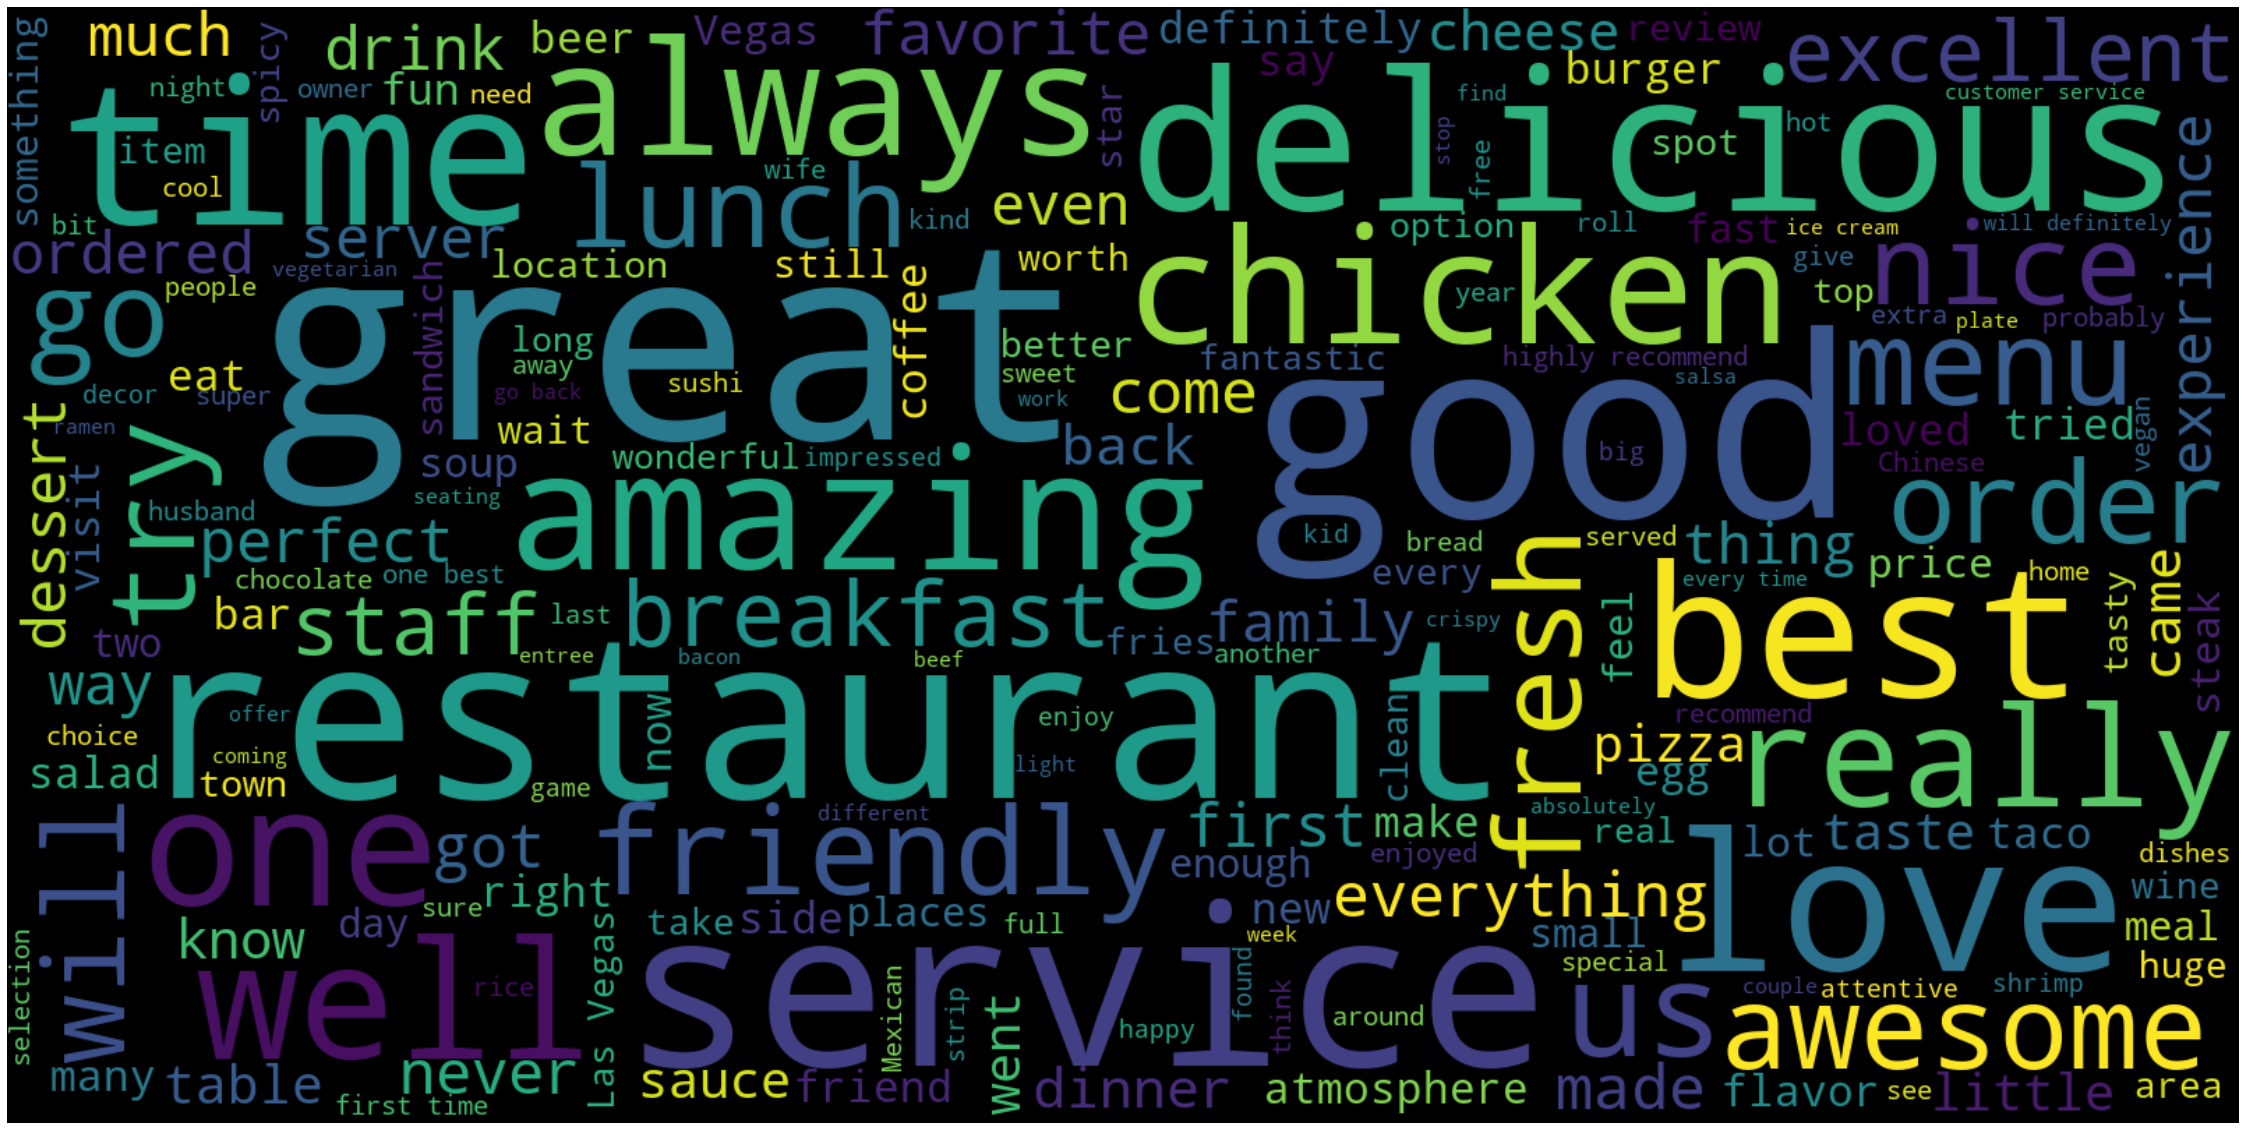

In [64]:
rcParams['figure.figsize'] = 40, 40
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

## General Word Cloud with Negative Reviews

In [65]:
# Negative Reviews Dataset
negative_reviews = one_star.text[1600:2000].tolist()
negative = " ".join(negative_reviews)

In [66]:
wordcloud = WordCloud(stopwords = stopwords,width=1600, height=800, max_font_size=200).generate(negative)

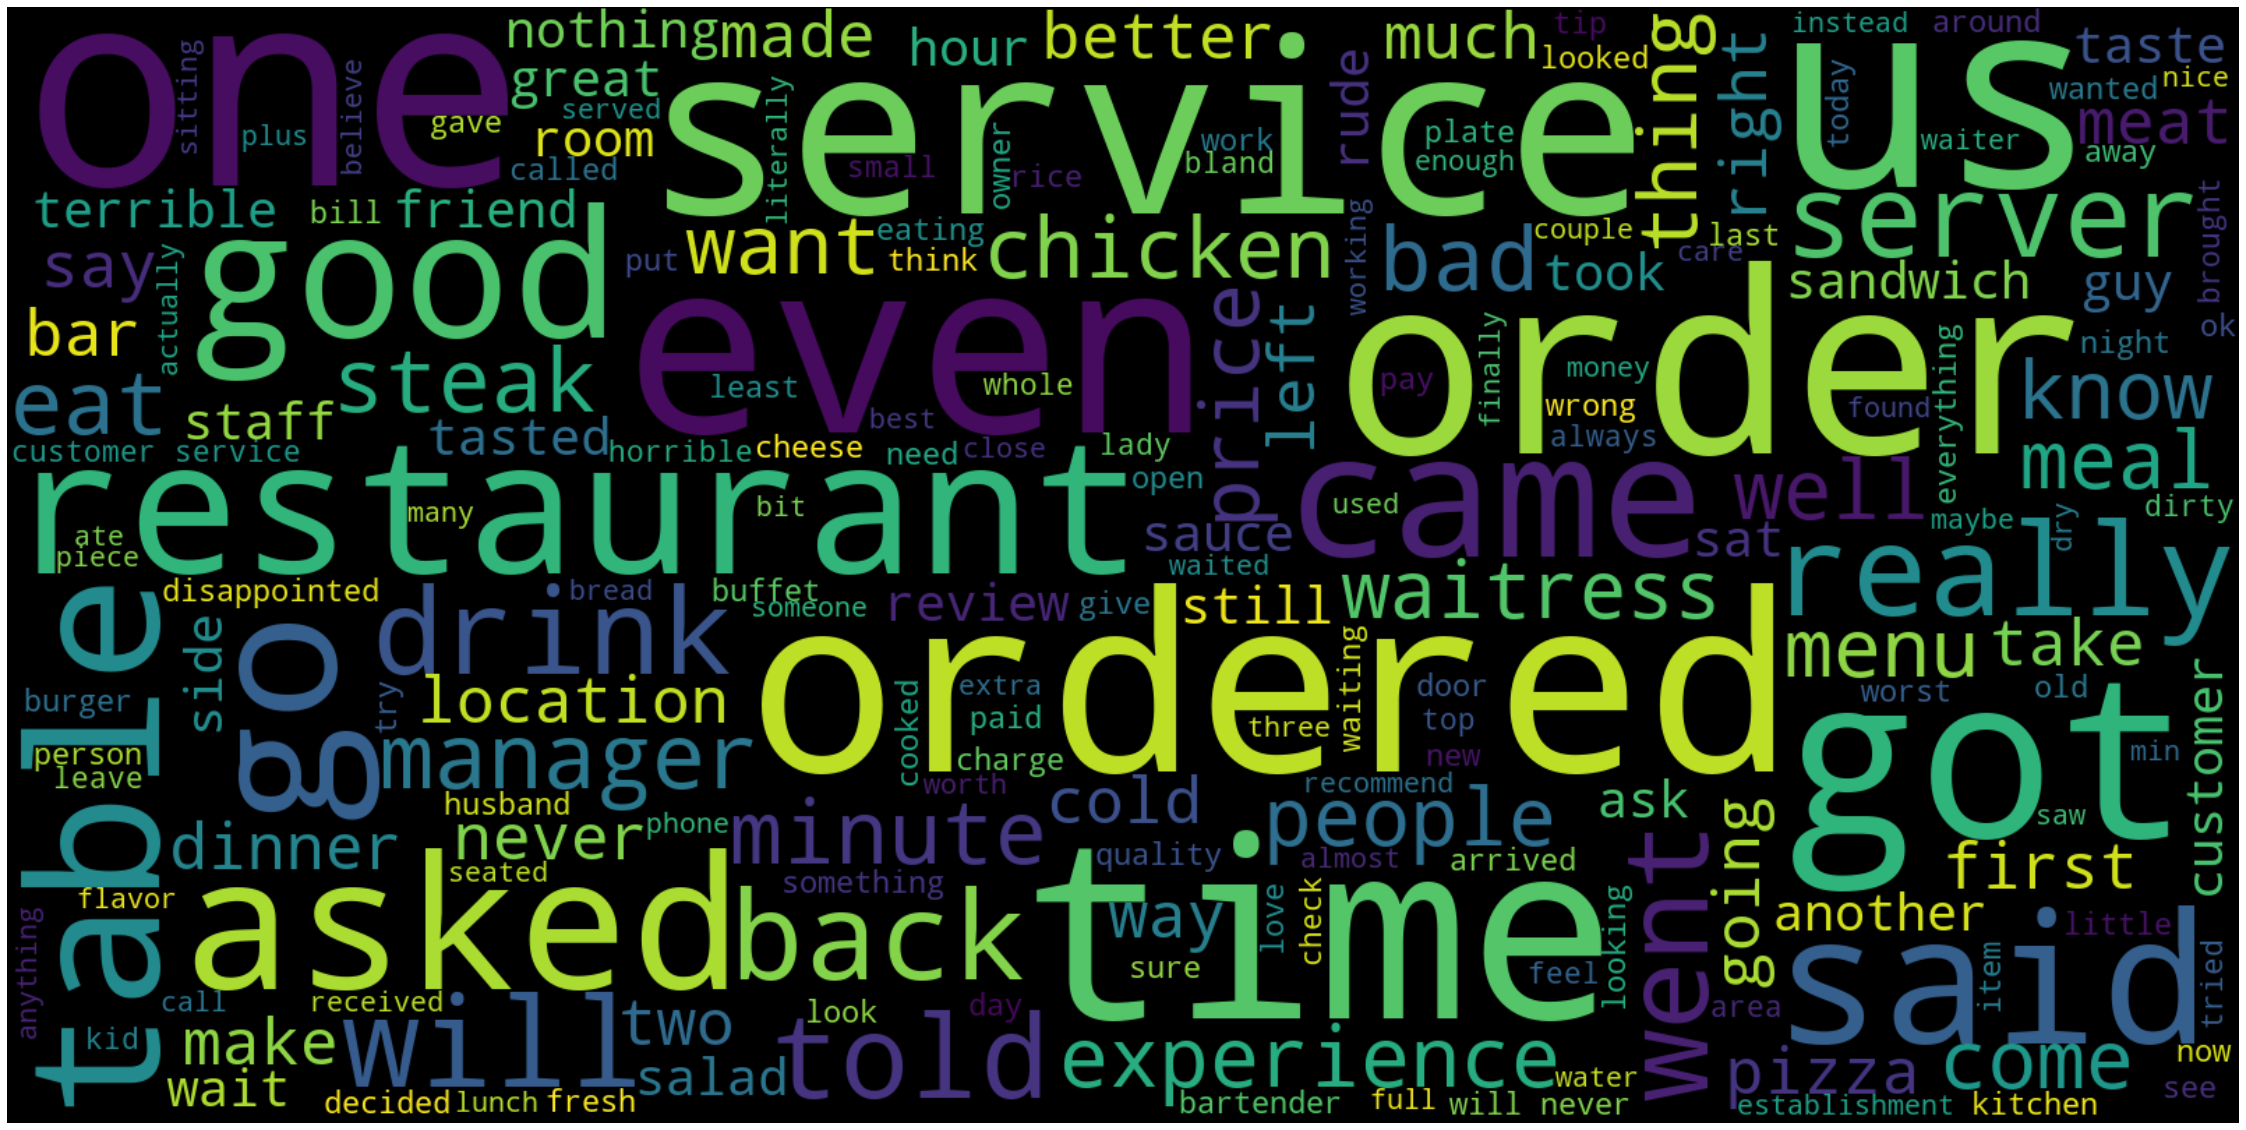

In [67]:
rcParams['figure.figsize'] = 40, 40
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

# Count Vectorizer

In [68]:
cvector = CountVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2))
cvector.fit(cloud_train_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [69]:
len(cvector.get_feature_names())

134907

## Positive Reviews

In [70]:
pos_matrix = cvector.transform(positive_reviews)
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])

In [71]:
positive_unique_terms = pos_tf[~pd.DataFrame(pos_tf.Terms.tolist()).isin(stopwords).any(1)]
positive_unique_terms[:20]

Terms  positive
22       great       223
26        good       187
29     and the       155
30     service       152
35      of the       139
37        time       119
39  this place       117
40        best       117
41  restaurant       116
43    the food       113
44         one       113
45   delicious       110
50      it was       104
51        back       103
56          go        94
57        love        94
59    the best        92
61        well        87
63     amazing        86
64        will        85

## Negative Reviews

In [72]:
neg_matrix = cvector.transform(negative_reviews)
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

In [73]:
negative_unique_terms = neg_tf[~pd.DataFrame(neg_tf.Terms.tolist()).isin(stopwords).any(1)]
negative_unique_terms[:20]

Terms  negative
36      it was       177
38         one       173
40        back       170
41     service       170
43          us       164
48        time       147
49        even       144
52       order       134
53     ordered       134
55      of the       131
56        will       131
57  this place       130
58          go       130
60       never       128
61        came       126
62         don       125
66      in the       121
67         got       121
68        didn       117
72        good       112

# TF-IDF Vectorizer

In [74]:
tvector = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2))
tvector.fit(cloud_train_data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=0.0, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

### Positive Reviews

In [75]:
pos_matrix = tvector.transform(positive_reviews)
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in tvector.vocabulary_.items()]
pos_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])

In [76]:
positive_unique_terms = pos_tf[~pd.DataFrame(pos_tf.Terms.tolist()).isin(stopwords).any(1)]
positive_unique_terms[:20]

Terms   positive
8        great  10.074095
19        good   7.060764
24     and the   6.232548
25     service   6.200161
26   delicious   6.015553
28     amazing   5.808566
30        best   5.678902
31        love   5.558969
34    friendly   5.515190
38  this place   5.075886
39    the food   5.041607
40    the best   5.030140
41  restaurant   4.587936
42      always   4.556567
45        time   4.414253
48      of the   4.113231
50    favorite   4.064171
51     chicken   3.982573
53         one   3.809039
56      it was   3.764781

* We think that TF-IDF analysis does a better job that CountVectorizer because it reveals more words that are unique to the particular subset of positive reviews. Some words like "great", "good", "favorite", and "delicious" are easy to understand, but then there are certain features of restaurants that get mentioned a lot too in these positive reviews, like the "service", "place", and the "time", presumably talking about the positive aspects of the particular restaurant.

## Negative Reviews

In [77]:
neg_matrix = tvector.transform(negative_reviews)
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in tvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])

In [78]:
negative_unique_terms = neg_tf[~pd.DataFrame(neg_tf.Terms.tolist()).isin(stopwords).any(1)]
negative_unique_terms[:20]

Terms  negative
31     service  5.229075
33        even  5.096261
39       never  4.862974
41        back  4.776545
43      it was  4.724989
44          us  4.691151
45       order  4.687237
46         one  4.586205
50         don  4.360704
52        time  4.286683
53         got  4.284274
54     minutes  4.271214
55        will  4.253893
56         bad  4.199710
58     ordered  4.120821
59  this place  4.108731
63        came  3.905639
64       asked  3.883210
66          go  3.834852
67    the food  3.816982

* On the other hand, the negative reviews focus on aspects of the restaurant like the "service", the "order", the "time", "the food", and the "place", as well as words that describe those aspects, like "bad".

* Looking at the terms "it was", we can see that it is possibly used as a tool to reminisce about the food that the reviewer had, but that it is more commonly found on average by bad reviews for the restaurant to give feedback about their experience.

# Restaurant Recommender

We wanted to apply K-NN algorithm to implement our own recommender system for restaurants. We will be using an intem-based collaborative filtering system, where we use patterns of useres who went to the same restaurant to make recommendations. 

For our K-NN Algorithm, we are trying to find our nearest neighbors based off of other users' behavior. If a lot of people visit both Restaurant A and Restaurant B, then the two restaurants are likely to be close neighbors, and we will recommend it to them. 

Can try both user-based and item-based collaborative filtering. 

In [ ]:
# restaurant dataset
rest_biz_csvTOpd.head()

In [ ]:
# restaurant reviews dataset

rest_review_csvTOpd.head()

In [ ]:
num_users = len(rest_review_csvTOpd['user_id'].unique())
print("number of unique users:", num_users)

num_rest_review = len(rest_review_csvTOpd['business_id'].unique())
print("number of unique restaurants:", num_rest_review)

For the KNN Model for item-based filtering, we will need to set up a matrix with restaurants for rows and users by columns, so we would getting a 11480909 x 59371 matrix. Pandas throws an error because this matrix is too large to process, so we will decide to focus the model on recommending restaurants by location, specifically by state. It makes sense too. No use in providing recommendations that are in another state and too far away. 

Where are most of the restaurants in the dataset located? 

In [ ]:
state_count = pd.DataFrame(rest_biz_csvTOpd.groupby('state').count()['business_id']).sort_values(by='business_id', ascending = True)
state_count.plot.barh(figsize = (10, 7))

We also will remove all states below Wisconson(WI) because they don't have enough restaurants for us to do recommendations. 

In [ ]:
# Getting restaurants id per state
on_rest_id = rest_biz_csvTOpd[rest_biz_csvTOpd['state'] == 'ON']['business_id']
az_rest_id = rest_biz_csvTOpd[rest_biz_csvTOpd['state'] == 'AZ']['business_id']
nv_rest_id = rest_biz_csvTOpd[rest_biz_csvTOpd['state'] == 'NV']['business_id']
qc_rest_id = rest_biz_csvTOpd[rest_biz_csvTOpd['state'] == 'QC']['business_id']
oh_rest_id = rest_biz_csvTOpd[rest_biz_csvTOpd['state'] == 'OH']['business_id']
nc_rest_id = rest_biz_csvTOpd[rest_biz_csvTOpd['state'] == 'NC']['business_id']
pa_rest_id = rest_biz_csvTOpd[rest_biz_csvTOpd['state'] == 'PA']['business_id']
ab_rest_id = rest_biz_csvTOpd[rest_biz_csvTOpd['state'] == 'AB']['business_id']

# Getting data per state
on_reviews = rest_review_csvTOpd[rest_review_csvTOpd['business_id'].isin(on_rest_id)]
az_reviews = rest_review_csvTOpd[rest_review_csvTOpd['business_id'].isin(az_rest_id)]
nv_reviews = rest_review_csvTOpd[rest_review_csvTOpd['business_id'].isin(nv_rest_id)]
qc_reviews = rest_review_csvTOpd[rest_review_csvTOpd['business_id'].isin(qc_rest_id)]
oh_reviews = rest_review_csvTOpd[rest_review_csvTOpd['business_id'].isin(oh_rest_id)]
nc_reviews = rest_review_csvTOpd[rest_review_csvTOpd['business_id'].isin(nc_rest_id)]
pa_reviews = rest_review_csvTOpd[rest_review_csvTOpd['business_id'].isin(pa_rest_id)]
ab_reviews = rest_review_csvTOpd[rest_review_csvTOpd['business_id'].isin(ab_rest_id)]

In [ ]:
print(on_reviews.shape)
print(az_reviews.shape)
print(nv_reviews.shape)
print(qc_reviews.shape)
print(oh_reviews.shape)
print(nc_reviews.shape)
print(pa_reviews.shape)
print(ab_reviews.shape)

Now that we know what kind of data we are working with, we need to process the data so that it can be put into the KNN model for recommendation. Like mentioned above, we need to convert each state's restaurant data into a no. of restaurants x no. of users sized matrix. KNN algorithm will take the matrix and determines a restaurant's neighbors based off of distance between to other restaurants. 

In [ ]:
def KNN_matrix(data):
    """takes in [state]_reviews dataframe and returns a sparse matrix and a list for business_id
    to prepare for KNN model. Beware of long run time"""
    
    matrix = data.pivot_table(index='business_id', columns='user_id', values = 'stars', aggfunc = 'mean').fillna(0)
    sparse_matrix = csr_matrix(matrix)
    
    business_id = list(matrix.index)
    business_names = []
    for i in business_id:
        business_names.append(list(rest_biz_csvTOpd[rest_biz_csvTOpd['business_id'] == i]['name'])[0])
        
    return (sparse_matrix, business_id, business_names)

# using pennsylvania data for now
pa_sparse = KNN_matrix(pa_reviews)



In [ ]:
Now that we have the sparse matrix ready, lets fit a KNN model.

In [ ]:
knn_model = NearestNeighbors(metric='cosine', n_neighbors = 10)
knn_model.fit(pa_sparse)

In [ ]:
def restaurant_recommender(model, sparse_matrix, n_recommendations = 5, fav_restaurant = ''):
    """takes in knn_model, a sparse matrix processed by KNN_matrix, and fav_restaurant which is restaurant on 
    which model makes recommendation. fav_restaurant does a fuzzy match(based on Levenshtein Distance) 
    in case restaurants are not typed in perfectly"""
    
    # unwraps sparse_matrix into its components
    matrix, business_id, business_names = sparse_matrix[0], sparse_matrix[1], sparse_matrix[2]
    
    if fav_restaurant == '':
        fav_restaurant = random.choice(business_names)
    
    # if fav_restaurant is not spelled perfectly, need to do a fuzzy match
    possible_matches = []
    match_scores = []
    for business in business_names:
        ratio = fuzz.ratio(business.lower(), fav_restaurant.lower())
        if ratio >= 50:
            possible_matches.append(business)
            match_scores.append(ratio)
    
    try:
        fav_restaurant = possible_matches[match_scores.index(max(match_scores))]
        fav_restaurant_index = business_names.index(fav_restaurant)
        distances, indices = model.kneighbors(matrix[fav_restaurant_index], n_neighbors = n_recommendations+1)
        
        for i, rest_id in enumerate(indices[0]):
            if i == 0:
                print('Your favorite restaurant is:', fav_restaurant, '\n')
                print('Here are some other restaurants that people visited: \n')
#             elif i + 1 == n_recommendations:
#                 break
            else:
                rest_recommend = business_names[rest_id]
                print(i,'.', rest_recommend)
    except:
        return "Oops, restaurant not in database"

Restaurant_recommender is the recommendation system code. Enter a restaurant below and get some recommendations! If you don't put in a restaurant, model will select a restaurant at random. 

In [ ]:
fav_restaurant=input("Enter a restaurant: ")
restaurant_recommender(knn_model, pa_sparse, 5, fav_restaurant)

Great! Our recommendation system makes solid recommendations for the most part. Recommendation was based on what other restaurants people visited who also visited this particular restaurant. There are many limitations to this algorithm which I will discuss in further detail, but for now, lets try to see how the recommender plays out with other states. 